<a href="https://colab.research.google.com/github/Bonado/APS360/blob/master/APS360_MNIST_CNN_Minimal_Working_Example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
torch.manual_seed(1)
from torchvision import datasets, transforms
!pip install torchviz
from torchviz import make_dot
mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)
mnist_train = mnist_data[:4096]
mnist_val   = mnist_data[4096:5120]

     |████████████████████████████████| 51kB 7.9MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=694d528d9b361757e025a4e3aaae7e1da890072f7b2d22afa7e65b27647c1483
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!





/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [22]:
class Flatten(nn.Module):
  def forward(self, x):
    N, C, H, W = x.size() # read in N, C, H, W
    #print(N,C,H,W)
    #print(x.view(-1, C*H*W).size())
    return x.view(N, -1)

In [5]:
def get_accuracy(model, train=False):
    if train:
        data = mnist_train
    else:
        data = mnist_val

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64, shuffle = True):
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [7]:
def train(model, data, batch_size=64, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle = True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss

            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...


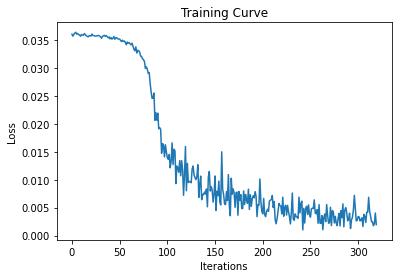

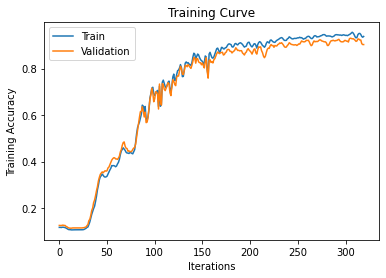

Final Training Accuracy: 0.938232421875
Final Validation Accuracy: 0.9033203125


In [24]:
use_cuda = True

#model = MNISTClassifier()

model =  nn.Sequential(
          nn.Conv2d(1, 5, 5), 
          nn.ReLU(), 
          nn.MaxPool2d(2,2), 
          nn.Conv2d(5, 10, 5), 
          nn.ReLU(),
          nn.MaxPool2d(2,2), 
          Flatten(), 
          nn.Linear(160, 32),
          nn.ReLU(),
          nn.Linear(32, 10)
      )
model

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model, mnist_train, num_epochs=5)

CUDA is available!  Training on GPU ...


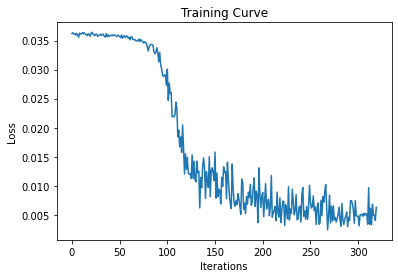

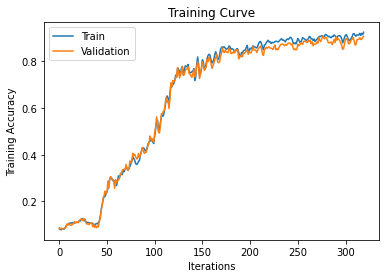

Final Training Accuracy: 0.924560546875
Final Validation Accuracy: 0.9072265625


In [30]:
use_cuda = True

#model = MNISTClassifier()

model2 =  nn.Sequential(
          nn.Conv2d(1, 5, 5), 
          nn.ReLU(), 
          nn.Dropout2d(p=0.1),
          nn.MaxPool2d(2,2), 
          nn.Conv2d(5, 10, 5), 
          nn.ReLU(),
          nn.Dropout2d(p=0.1),
          nn.MaxPool2d(2,2), 
          Flatten(), 
          nn.Linear(160, 32),
          nn.ReLU(),
          nn.Linear(32, 10)
      )
model2

if use_cuda and torch.cuda.is_available():
  model2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model2, mnist_train, num_epochs=5)

CUDA is available!  Training on GPU ...


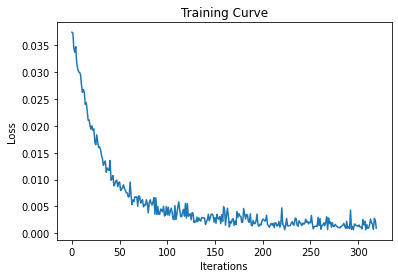

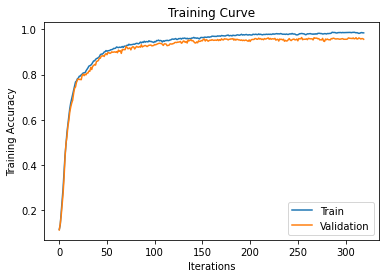

Final Training Accuracy: 0.984375
Final Validation Accuracy: 0.9560546875


In [32]:
use_cuda = True

#model = MNISTClassifier()

model3 =  nn.Sequential(
          nn.Conv2d(1, 5, 5), 
          nn.ReLU(), 
          nn.MaxPool2d(2,2), 
          nn.Conv2d(5, 10, 5), 
          nn.ReLU(),
          nn.MaxPool2d(2,2), 
          Flatten(), 
          nn.Linear(160, 32),
          nn.ReLU(),
          nn.BatchNorm1d(32),
          nn.Linear(32, 10)
      )
model3

if use_cuda and torch.cuda.is_available():
  model3.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model3, mnist_train, num_epochs=5)

CUDA is available!  Training on GPU ...


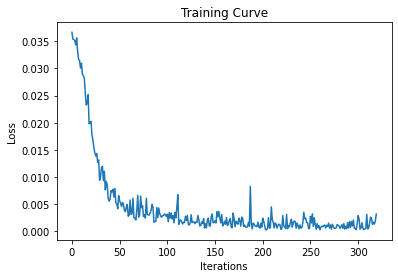

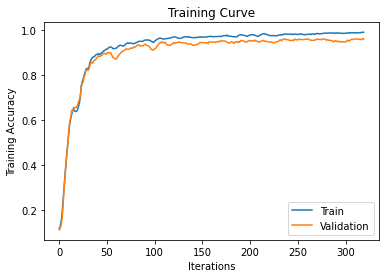

Final Training Accuracy: 0.990478515625
Final Validation Accuracy: 0.9599609375


In [35]:
use_cuda = True

#model = MNISTClassifier()

model4 =  nn.Sequential(
          nn.Conv2d(1, 5, 5), 
          nn.ReLU(), 
          nn.BatchNorm2d(5),
          nn.MaxPool2d(2,2), 
          nn.Conv2d(5, 10, 5), 
          nn.ReLU(),
          nn.BatchNorm2d(10),
          nn.MaxPool2d(2,2), 
          Flatten(), 
          nn.Linear(160, 32),
          nn.ReLU(),
          nn.Linear(32, 10)
      )
model4

if use_cuda and torch.cuda.is_available():
  model4.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model4, mnist_train, num_epochs=5)